# Importing and Fixing Data

In [89]:
#Imports
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

In [90]:
#naming coloumns
names = ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

#importing dataset
data = pd.read_csv("Adult_Census_Income_Binary_Classification_dataset.csv", names=names)

In [91]:
#appending
coloumns = []
for i in [1,2,4,5,6,7,8,12,13]:
    coloumns.append(data.columns[i])

In [92]:
#handling the missing data
data = data.replace(" ?", pd.NaT)
data = data.drop(0)
data.dropna(inplace=True)

In [93]:
for i in coloumns:
    data[i] = data[i].astype('category')

In [94]:
for i in coloumns:
    data[i] = pd.Categorical(data[i]).codes

In [95]:
#display first 5 rows
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
2,50,4,9,13,2,3,0,4,1,0,0,13,38,0
3,38,2,11,9,0,5,1,4,1,0,0,40,38,0
4,53,2,1,7,2,5,0,2,1,0,0,40,38,0
5,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [96]:
#no of items
data.shape

(30162, 14)

In [97]:
X = np.zeros((13, len(data)))

In [98]:
for i in range(len(data.columns)-1):
    X[i] = np.array(data[data.columns[i]])

In [99]:
X = X.transpose()

In [100]:
y = np.array(data[data.columns[13]])

In [101]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.20)  

In [102]:
#feature scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

# K Nearest Neighbour

In [103]:
#k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
kNear = KNeighborsClassifier()

In [104]:
#fitting
kNear.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [105]:
#score
kNear.score(X_test, y_test)

0.8229736449527598

In [106]:
#predicting
from sklearn.metrics import accuracy_score
prediction1 = kNear.predict(X_test)
accuracy_score(prediction1, y_test)

0.8229736449527598

In [107]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, prediction1))  
print(classification_report(y_test, prediction1))  

[[4069  451]
 [ 617  896]]
             precision    recall  f1-score   support

          0       0.87      0.90      0.88      4520
          1       0.67      0.59      0.63      1513

avg / total       0.82      0.82      0.82      6033



In [108]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction2 = knn.predict(X_test)
    error.append(np.mean(prediction2 != y_test))
    print(confusion_matrix(y_test, prediction2))  
    print(classification_report(y_test, prediction2))  

[[3913  607]
 [ 641  872]]
             precision    recall  f1-score   support

          0       0.86      0.87      0.86      4520
          1       0.59      0.58      0.58      1513

avg / total       0.79      0.79      0.79      6033

[[4264  256]
 [ 882  631]]
             precision    recall  f1-score   support

          0       0.83      0.94      0.88      4520
          1       0.71      0.42      0.53      1513

avg / total       0.80      0.81      0.79      6033

[[4004  516]
 [ 631  882]]
             precision    recall  f1-score   support

          0       0.86      0.89      0.87      4520
          1       0.63      0.58      0.61      1513

avg / total       0.81      0.81      0.81      6033

[[4226  294]
 [ 775  738]]
             precision    recall  f1-score   support

          0       0.85      0.93      0.89      4520
          1       0.72      0.49      0.58      1513

avg / total       0.81      0.82      0.81      6033

[[4069  451]
 [ 617  896]]
     

Text(0,0.5,'Mean Error')

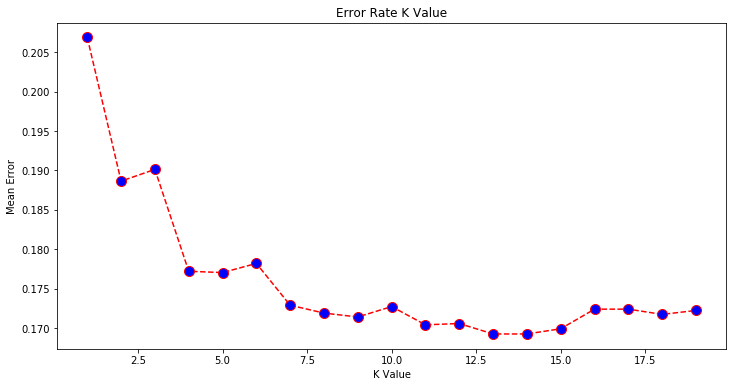

In [109]:
#plot for mean error
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

# Logistic Regression

In [110]:
#imports
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
from keras.utils import np_utils
from keras.optimizers import SGD

In [111]:
batchSize = 75
outputs = 2

In [112]:
y_train = np_utils.to_categorical(y_train, outputs)
y_test = np_utils.to_categorical(y_test, outputs)

In [113]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [114]:
model1 = Sequential()

In [115]:
model1.add(Dense(2, input_dim=(13), kernel_initializer='normal', activation='softmax'))

In [116]:
model1.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

In [117]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2)                 28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [118]:
model1.fit(X_train, y_train, batch_size = batchSize, epochs = 50)

Epoch 1/50
24129/24129 [==============================] - 14s 597us/step - loss: 0.4293 - acc: 0.8097
Epoch 2/50
24129/24129 [==============================] - 13s 522us/step - loss: 0.3964 - acc: 0.8186
Epoch 3/50
24129/24129 [==============================] - 13s 557us/step - loss: 0.3936 - acc: 0.8203
Epoch 4/50
24129/24129 [==============================] - 12s 492us/step - loss: 0.3919 - acc: 0.8205
Epoch 5/50
24129/24129 [==============================] - 10s 398us/step - loss: 0.3915 - acc: 0.8213
Epoch 6/50
24129/24129 [==============================] - 14s 593us/step - loss: 0.3909 - acc: 0.8216
Epoch 7/50
24129/24129 [==============================] - 14s 592us/step - loss: 0.3907 - acc: 0.8211
Epoch 8/50
24129/24129 [==============================] - 13s 540us/step - loss: 0.3905 - acc: 0.8220
Epoch 9/50
24129/24129 [==============================] - 15s 614us/step - loss: 0.3904 - acc: 0.8210
Epoch 10/50
24129/24129 [==============================] - 12s 505us/step - loss: 

In [119]:
prediction3 = model1.predict(X_test)

In [120]:
evalLR = model1.evaluate(X_test, y_test, verbose=1)

6033/6033 [==============================] - 1s 193us/step


In [121]:
print('Test score:', evalLR[0])

Test score: 0.3974982785799206


In [122]:
print('Test accuracy:', evalLR[1])

Test accuracy: 0.8199900547287939


# Neural Network

In [123]:
model2 = Sequential()

In [124]:
model2.add(Dense(20, input_dim=13, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(outputs, activation='softmax'))

In [125]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [126]:
model2.fit(X_train, y_train, batch_size = batchSize, epochs = 25)

Epoch 1/25
24129/24129 [==============================] - 86s 4ms/step - loss: 0.4347 - acc: 0.7907
Epoch 2/25
24129/24129 [==============================] - 91s 4ms/step - loss: 0.3475 - acc: 0.8356
Epoch 3/25
24129/24129 [==============================] - 97s 4ms/step - loss: 0.3344 - acc: 0.8419
Epoch 4/25
24129/24129 [==============================] - 100s 4ms/step - loss: 0.3304 - acc: 0.8448
Epoch 5/25
24129/24129 [==============================] - 101s 4ms/step - loss: 0.3277 - acc: 0.8469
Epoch 6/25
24129/24129 [==============================] - 106s 4ms/step - loss: 0.3264 - acc: 0.8471
Epoch 7/25
24129/24129 [==============================] - 111s 5ms/step - loss: 0.3247 - acc: 0.8489
Epoch 8/25
24129/24129 [==============================] - 106s 4ms/step - loss: 0.3243 - acc: 0.8484
Epoch 9/25
24129/24129 [==============================] - 107s 4ms/step - loss: 0.3233 - acc: 0.8495
Epoch 10/25
24129/24129 [==============================] - 114s 5ms/step - loss: 0.3224 - acc:

In [127]:
prediction4 = model2.predict(X_test)

In [128]:
evalNN = model2.evaluate(X_test, y_test, verbose=1)

6033/6033 [==============================] - 11s 2ms/step


In [129]:
print('Test score:', evalNN[0])

Test score: 0.34298954416265853


In [130]:
print('Test accuracy:', evalNN[1])

Test accuracy: 0.8390518813490492
